In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('auto_insurance_payment.csv')

In [5]:
data.head()

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194


In [6]:
data.tail()

,Number of claims,Total Payment
58,9,874
59,31,2098
60,14,955
61,53,2446
62,26,1875


In [7]:
data.dtypes

Number of claims    int64
 Total Payment      int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
Number of claims    63 non-null int64
 Total Payment      63 non-null int64
dtypes: int64(2)
memory usage: 1.1 KB


In [9]:
data.describe()

,Number of claims,Total Payment
count,63.000000,63.000000
mean,22.904762,921.873016
std,23.351946,878.266281
min,0.000000,0.000000
25%,7.500000,299.000000
50%,14.000000,596.000000
75%,29.000000,1364.000000
max,124.000000,4222.000000


# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015DD4870448>,
      dtype=object)

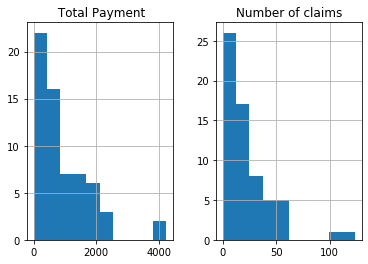

In [10]:
data.hist()

In [11]:
data.corr()

,Number of claims,Total Payment
Number of claims,1.000000,0.880668
Total Payment,0.880668,1.000000


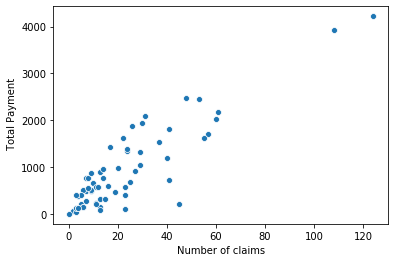

In [14]:
sns.scatterplot(data['Number of claims'],data[' Total Payment'])

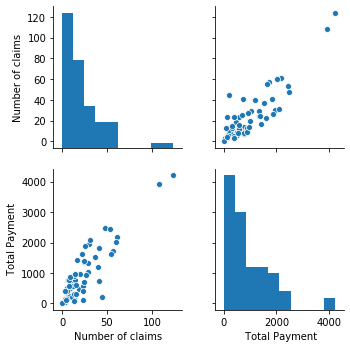

In [15]:
sns.pairplot(data)

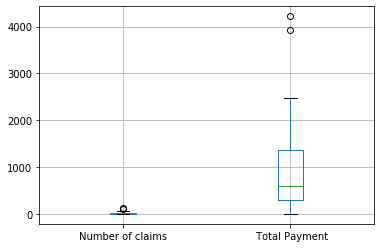

In [16]:
data.boxplot()

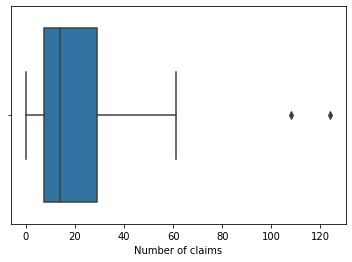

In [17]:
sns.boxplot(data['Number of claims'])

# Assign the features to X & Y

In [18]:
data.head(1)

,Number of claims,Total Payment
0,108,3925


In [19]:
x=data.iloc[:,:1]

In [21]:
x.head(1)

,Number of claims
0,108


In [22]:
y=data.iloc[:,1:]

In [24]:
y.head(1)

,Total Payment
0,3925


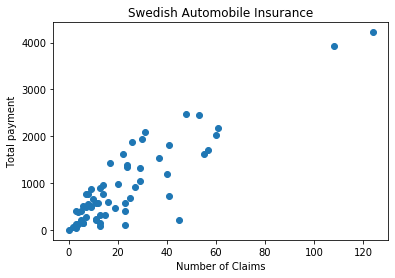

In [25]:
# Visualise dataset
plt.scatter(x, y)
plt.title('Swedish Automobile Insurance')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment')
plt.show()

# Split the records for training & testing

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [27]:
data.shape

(63, 2)

In [28]:
X_train.shape

(50, 1)

In [29]:
X_test.shape

(13, 1)

In [30]:
y_train.shape

(50, 1)

In [31]:
y_test.shape

(13, 1)

# Model Building with sklearn

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()


# Train the model

In [33]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lin_reg.coef_

array([[32.14357493]])

In [35]:
lin_reg.intercept_

array([194.87747509])

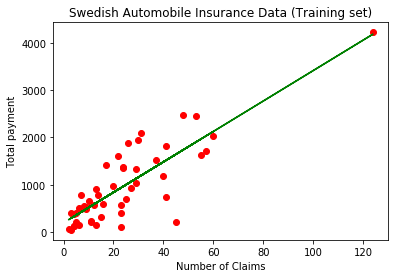

In [36]:
 #Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'green')
plt.title('Swedish Automobile Insurance Data (Training set)')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment')
plt.show()


# Test the model

In [37]:
ypred=lin_reg.predict(X_test)
ypred

array([[2155.63554596],
       [3666.38356777],
       [ 612.74394921],
       [ 484.16964948],
       [ 291.30819988],
       [ 452.02607454],
       [ 548.45679934],
       [ 419.88249961],
       [ 612.74394921],
       [ 387.73892468],
       [ 805.6053988 ],
       [ 194.87747509],
       [ 644.88752414]])

In [39]:
X_test.head()

,Number of claims
36,61
0,108
51,13
58,9
23,3


In [40]:
data.head()

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194


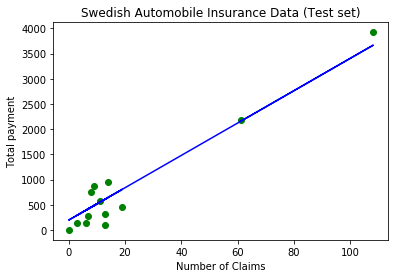

In [41]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.title('Swedish Automobile Insurance Data (Test set)')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment')
plt.show()


# estimate the cost

In [42]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.9284723758722918
The RMSE value is........ 281.1486957455126


In [43]:
data.head()

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194


# How to predict for unseen value

In [52]:
unseen_pred=lin_reg.predict(np.array([[3234]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[104147.19880612]]
